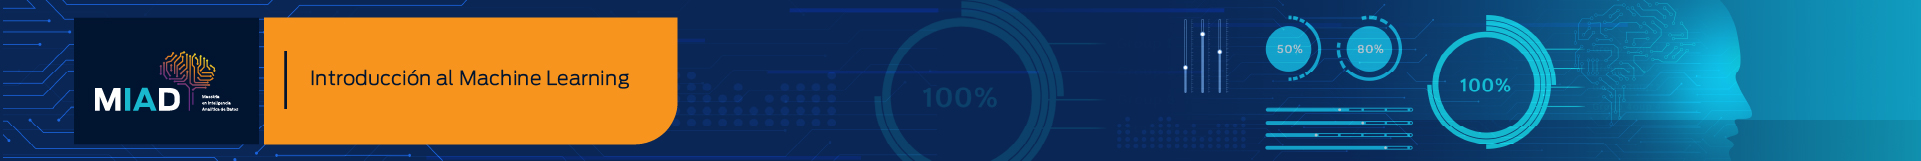

# Introducción al Machine Learning - Semana 4
## Caso: Implementación de modelos no lineales aditivos en un problema de regresión

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos no lineales aditivos y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos MARS y GAM.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:  

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación de modelos lineales: Se estiman los tres modelos lineales solicitados, se evalúan en test y se concluye correctamente qué modelo tiene mayor capacidad predictiva. [10 puntos] 

Estimación del modelo MARS: Se estima el modelo MARS correctamente [15 puntos] 

Interpretación de predictores MARS: Se interpretan al menos tres predictores en el modelo MARS y no se presentan errores en este análisis. [15 puntos] 

Estimación del modelo GAM: Se estima el modelo GAM correctamente [10 puntos] 

Interpretación de predictores GAM: Se interpretan los mismos predictores que en el modelo MARS y no presenta errores en su análisis. [10 puntos] 

Conclusión sobre la primera hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos] 

Conclusión sobre la segunda hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos]

### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Carseats", la cual contiene 10 variables predictivas. De esta manera, el objetivo de la actividad es predecir la variable de ventas "Sales".

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-carseats


### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [ ]:
#https://www.lfd.uci.edu/~gohlke/pythonlibs/

In [ ]:
pip install pygam

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.cross_decomposition import PLSRegression


from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

import statsmodels.api as sm
from pyearth import earth

import math
from pygam import GAM, s, LinearGAM, te, f, l

sns.set_style()

In [2]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
dir = "data\dataset-11424.csv"
data = pd.read_csv(dir) 
print(data.describe())
#data = data[data.describe().columns]

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

In [3]:
XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="Sales"), data["Sales"], test_size=0.2, random_state=0)
#del(data)

In [4]:
XTrain.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

In [5]:
XTrain.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,124.540625,67.865625,6.596875,267.271875,115.893750,52.793750,13.937500
std,15.223875,27.674962,6.700722,146.300710,23.489235,16.220115,2.584466
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.000000,0.000000,143.500000,99.750000,39.000000,12.000000
50%,124.500000,68.500000,5.000000,276.000000,117.000000,54.000000,14.000000
75%,135.000000,90.250000,12.000000,396.500000,131.000000,65.000000,16.000000
max,162.000000,120.000000,26.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
yTrain.describe()

count    320.000000
mean       7.409000
std        2.865923
min        0.000000
25%        5.360000
50%        7.410000
75%        9.257500
max       16.270000
Name: Sales, dtype: float64

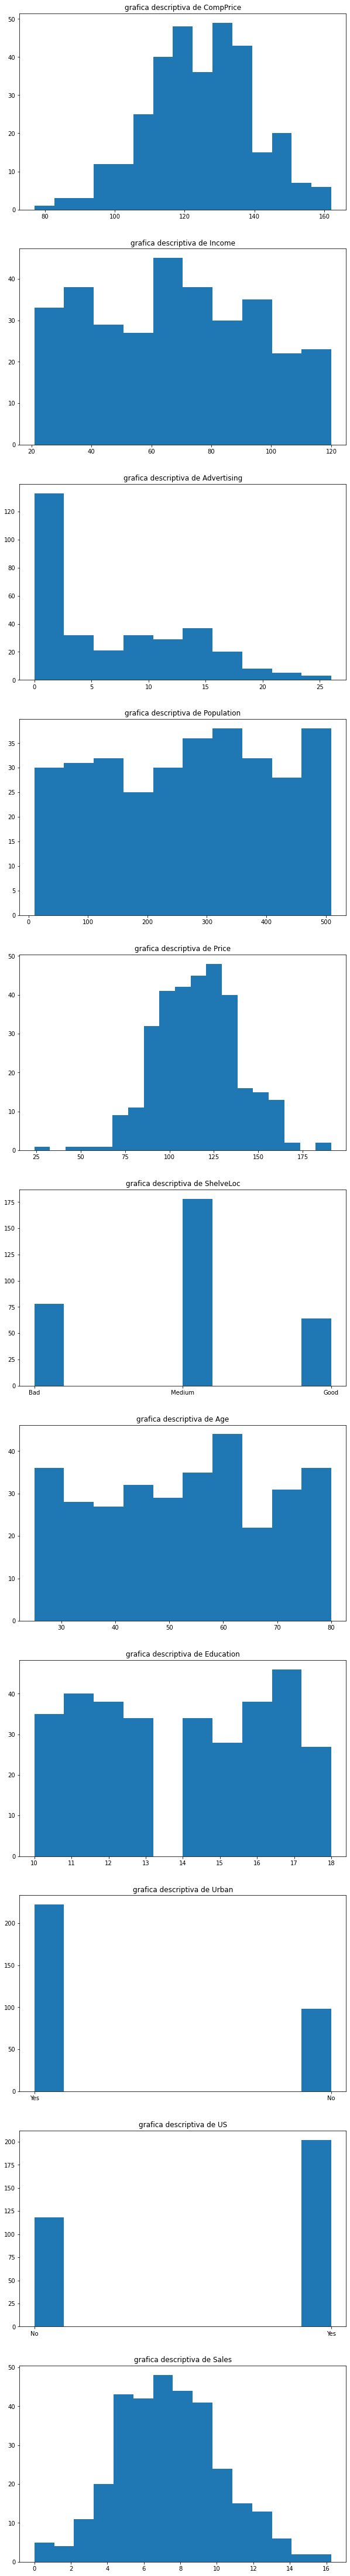

In [7]:
desc_df = pd.concat([XTrain,yTrain],axis=1)

fig ,axes = plt.subplots(nrows=len(desc_df.columns),ncols=1, figsize=(10, 80))

axs = axes.flatten()

for i, c in enumerate(desc_df):
    
    axs[i].hist(desc_df[c], bins='auto')
    axs[i].set_title("grafica descriptiva de {}".format(c))

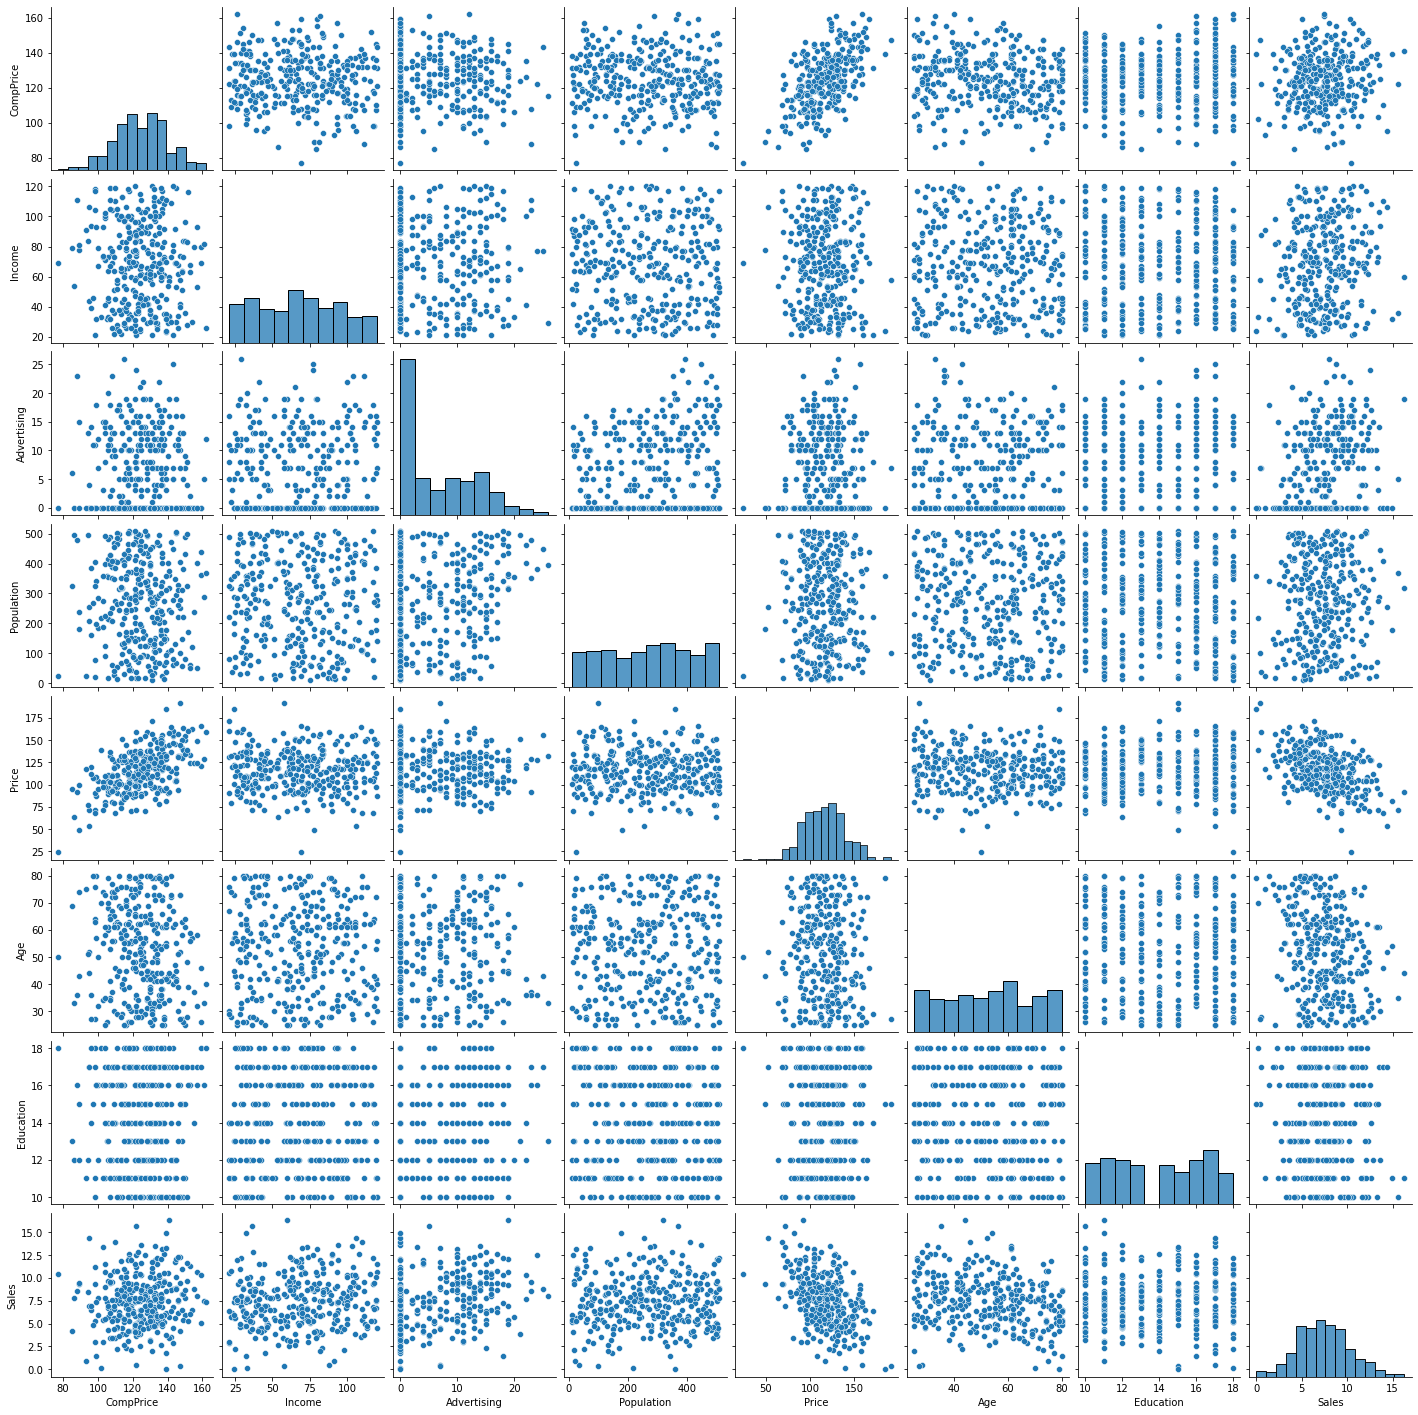

In [8]:
sns.pairplot(desc_df, kind="scatter")

<AxesSubplot:>

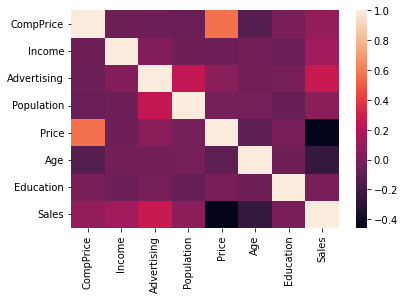

In [9]:
sns.heatmap(desc_df.corr())

Existen variables categoricas que pueden ser transformadas a valores numericos para su processamiento por parte del modelo,  continuacion se hace dicha transofrmacion 

In [10]:
XTrain = pd.get_dummies(XTrain, columns=['ShelveLoc','Urban','US'], drop_first = True)
XTest = pd.get_dummies(XTest, columns=['ShelveLoc','Urban','US'], drop_first = True)

Escalamiento de variables

para ello solo se escalan las variables distintas a variables dummies

In [11]:
cols_escala = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(XTrain[cols_escala])

XTrain_escalado = XTrain.copy()
XTest_escalado = XTest.copy()
XTrain_escalado[cols_escala] = scaler.transform(XTrain[cols_escala])
XTest_escalado[cols_escala] = scaler.transform(XTest[cols_escala])

C:\Users\paulg\AppData\Local\Temp\ipykernel_11860\3787827348.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


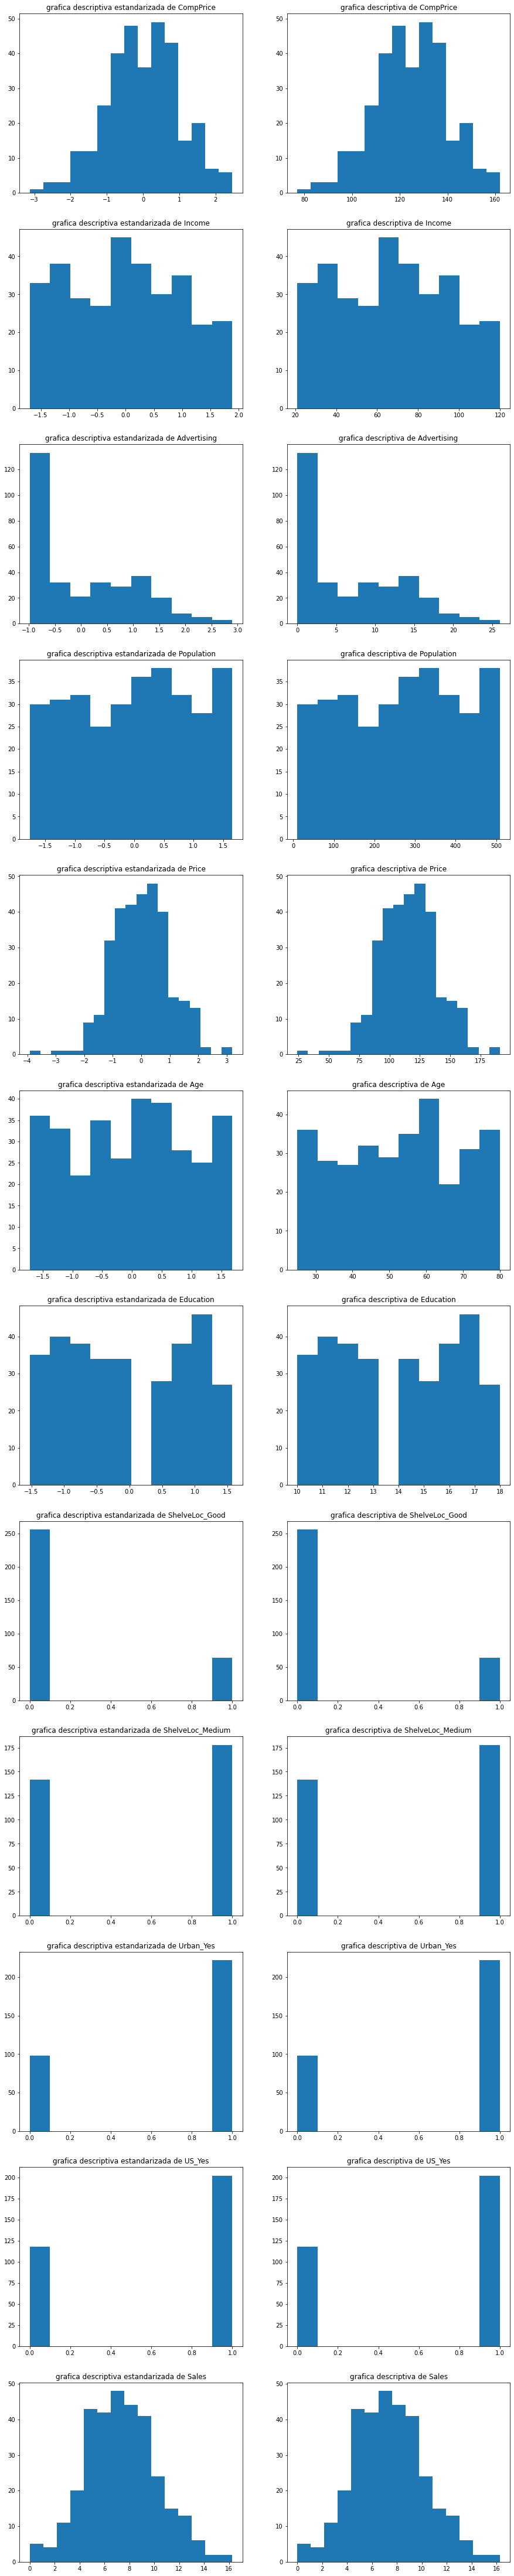

In [15]:
desc_df = pd.concat([XTrain,yTrain],axis=1)
desc_df2 = pd.concat([pd.DataFrame(XTrain_escalado, columns = XTrain.columns, index = XTrain.index),yTrain],axis=1)


fig1 ,axes1 = plt.subplots(nrows=len(desc_df2.columns),ncols=2, figsize=(15, 80))

axs1 = axes1.flatten()

for i, c in enumerate(desc_df.columns):
    axs1[2*i].hist(desc_df2[c], bins='auto')
    axs1[2*i].set_title("grafica descriptiva estandarizada de {}".format(c))

    axs1[2*i+1].hist(desc_df[c], bins='auto')
    axs1[2*i+1].set_title("grafica descriptiva de {}".format(c))

fig1.show()

A partir de las graficas no se ve una relacion evidente entre las variables X y la salida *Sales*, excepto la variable price que si evidencia un comportamiento marcado en donde a mayor precio menores ventas, esto nos puede indicar que esta variable pupede ser importante para los modelos.
no todas las variables tienen un adistribucion normal, algunas de estas incluso parecen distribuciones mas cercanas a la uniforme como *Population*, a partir de esto p

### 2. Estimación de modelos lineales  (10 puntos)
Encuentren el modelo lineal que mejor predice la variable "Sales" entre Lasso, PCA, PLS. Para esto, estimen los modelos usando la muestra de entrenamiento y evalúen el poder predictivo en la muestra de test. Describan su procedimiento y analicen los resultados.

#### PCA
se realiza en analisis sobre la totalidad de las variables y se determina la mejor cantidad de variables a seleccionar para obtener el mejor resultado


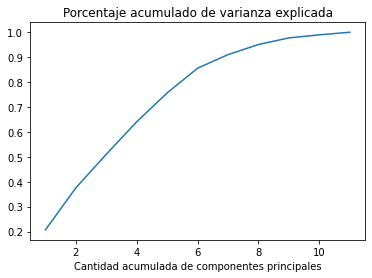

In [79]:
# PCA

p=len(XTrain_escalado.columns)
pca = PCA(n_components=p).fit(XTrain_escalado)
A=pca.components_

varianzaExplicada=pca.explained_variance_
porcentajeVarianzaExplicada=pca.explained_variance_ratio_

plt.plot(range(1,p+1),np.cumsum(porcentajeVarianzaExplicada))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

In [80]:
ZTrain=np.matmul(XTrain_escalado,A)
#aplica la regresion
regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

ZTest=np.matmul(XTest_escalado,A)

yTest_PCA=regPCA.predict(ZTest)
MSEPCAfull=np.average(np.square(yTest_PCA-yTest))
print('MSE regresión PCA con todas las componentes principales:')
print(MSEPCAfull)

MSE regresión PCA con todas las componentes principales:
1.320694269388731


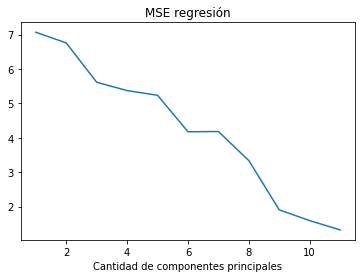

In [82]:
mse_components = []

for i in np.arange(1,p+1):
    ZTrain_total=np.matmul(XTrain_escalado,A)
    ZTrain_i = ZTrain_total.iloc[:,range(i)]

    regPCA = LinearRegression()
    regPCA.fit(ZTrain_i, yTrain)

    ZTotalTest=np.matmul(XTest_escalado,A)
    ZTest_i = ZTotalTest.iloc[:,range(i)]

    yTest_PCA=regPCA.predict(ZTest_i)
    MSEPCA=np.average(np.square(yTest_PCA-yTest))
    mse_components.append(MSEPCA)


plt.plot(np.arange(1,p+1),mse_components)
plt.xlabel('Cantidad de componentes principales')
plt.title('MSE regresión')
plt.show()

In [83]:
nComponentesElegidas = np.argmin(mse_components) + 1

ZTotalTrain=np.matmul(XTrain_escalado,A)
ZTrain = ZTotalTrain.iloc[:,range(nComponentesElegidas)]

regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

ZTotalTest=np.matmul(XTest_escalado,A)
ZTest = ZTotalTest.iloc[:,range(nComponentesElegidas)]

yTest_PCA=regPCA.predict(ZTest)
MSEPCAargmin=np.average(np.square(yTest_PCA-yTest))
# mse_components.append(MSEPCAargmin)

print('MSE regresión PCA por {} componentes principales:'.format(nComponentesElegidas))
print(MSEPCAargmin)

MSE regresión PCA por 11 componentes principales:
1.320694269388731


#### PLS

Se realiza el anlaisis total y se elige la mejor cantidad de variables a considerar

In [20]:
#PLS

pls = PLSRegression(n_components=p)
pls.fit(XTrain_escalado, yTrain)

yTest_PLS = pls.predict(XTest_escalado)

yTest_PLS=np.hstack(yTest_PLS)
MSEPLS=np.average(np.square(yTest_PLS - yTest))
print('MSE regresión por partial least squares:')
print(MSEPLS)

MSE regresión por partial least squares:
1.3206942693887318


MSE regresión por partial least squares:
2.4297244875836332
MSE regresión por partial least squares:
1.4621791387078162
MSE regresión por partial least squares:
1.307606264758879
MSE regresión por partial least squares:
1.3004708399816767
MSE regresión por partial least squares:
1.291943110677306
MSE regresión por partial least squares:
1.3203862268587705
MSE regresión por partial least squares:
1.3207315969927826
MSE regresión por partial least squares:
1.3206697740871718
MSE regresión por partial least squares:
1.3206902560684464
MSE regresión por partial least squares:
1.3206975513797168


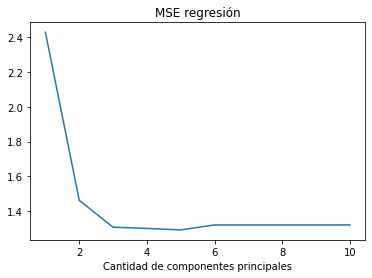

In [21]:

MSE_PLS_array = []
for i in range(1,p):
    pls = PLSRegression(n_components=i)
    pls.fit(XTrain_escalado, yTrain)

    prediccionPLS=pls.predict(XTest_escalado)

    prediccionPLS=np.hstack(prediccionPLS)
    MSEPLS = np.average(np.square(prediccionPLS-yTest))
    print('MSE regresión por partial least squares:')
    print(MSEPLS)

    MSE_PLS_array.append(MSEPLS)

plt.plot(np.arange(1,p),MSE_PLS_array)
plt.xlabel('Cantidad de componentes principales')
plt.title('MSE regresión')
plt.show()

In [22]:
pmin = np.argmin(MSE_PLS_array)+1


scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(XTrain_escalado)
XEscaladoTrain = scaler.transform(XTrain_escalado)

pls = PLSRegression(n_components = pmin)
pls.fit(XTrain_escalado, yTrain)

XEscaladoTest = scaler.transform(XTest_escalado)
yTest_PLS = pls.predict(XTest_escalado)



print('MSE regresión PCA por {} componentes principales:'.format(pmin))
yTest_PLS=np.hstack(yTest_PLS)
MSEPLS=np.average(np.square(yTest_PLS - yTest))
print('MSE regresión por partial least squares:')
print(MSEPLS)

MSE regresión PCA por 5 componentes principales:
MSE regresión por partial least squares:
1.291943110677306


#### LASSO

In [23]:
#Lasso
   
n_alphas = 200
alphasCalibrar = np.logspace(-4, 4, n_alphas)
# l1 es Lasso

modeloElastic = ElasticNetCV(alphas = alphasCalibrar, cv=5, random_state=0, l1_ratio=1, max_iter=5000).fit(XTrain_escalado,yTrain)
r2lasso = modeloElastic.score(XTrain_escalado, yTrain)

prediccionElastic=modeloElastic.predict(XTest_escalado)
MSEElastic=np.average(np.square(prediccionElastic-yTest))
print('MSE regresión con penalización tipo Elastic Net:')
print(MSEElastic)

MSE regresión con penalización tipo Elastic Net:
1.3201717978477006


In [36]:
#Lasso

#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

step = 0.1
arr_l1_ratio = np.arange(0,1+step,step)

r2 = []

for l1 in arr_l1_ratio:
    
    n_alphas = 200
    alphasCalibrar = np.logspace(-4, 4, n_alphas)
    # l1 es Lasso
    
    modeloElastic = ElasticNetCV(alphas = alphasCalibrar, cv=5, random_state=0, l1_ratio=l1, max_iter=10000).fit(XTrain_escalado,yTrain)
    r2MEN = modeloElastic.score(XTrain_escalado, yTrain)
    r2.append(r2MEN)

c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1092.2793966225001, tolerance: 0.21846573
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increa

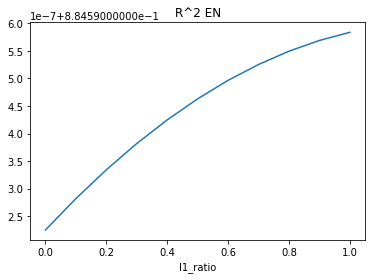

In [37]:
plt.plot(arr_l1_ratio,r2)
plt.xlabel('l1_ratio')
plt.title('R^2 EN')
plt.show()

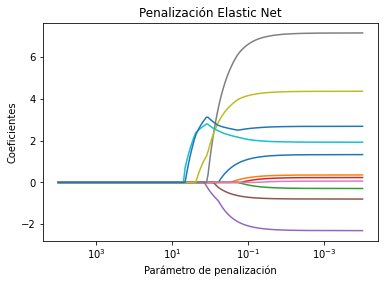

El parametro de L1 es:
1
El parámetro de penalización es:
0.0001
El valor del R^2 es:
0.8845905836131209
Los coeficientes estimados son:
[ 1.43683597  0.41259257  0.88789736 -0.00995054 -2.29599782 -0.74844595
 -0.13921844  4.92110926  2.00553879  0.09507632 -0.29695593]


In [38]:
coefs = []
for a in alphasCalibrar:
    elasticNet = ElasticNet(alpha=a, fit_intercept=False,max_iter=10000, l1_ratio = 1)
    elasticNet.fit(XTrain_escalado, yTrain)
    coefs.append(elasticNet.coef_)

# Presentación de resultados

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización Elastic Net')
plt.axis('tight')
plt.show()


print('El parametro de L1 es:')
print(1)
print('El parámetro de penalización es:')
print(modeloElastic.alpha_)
print('El valor del R^2 es:')
print(modeloElastic.score(XTrain_escalado, yTrain))
print('Los coeficientes estimados son:')
print(modeloElastic.coef_)
# print("valores de alpha probados: ")
# print(modeloElastic.alphas)

Entre estos 3 modelos el mejor fue **PLS** el cual tiene en cuenta la relacion entre las X de entrada con la Y de salida

El modelo penalizando con LASSO no elimina ninguna variable del analisis y su coeficiente es bajo 0.0001 casi nulo es decir el efecto de la penalizacion esta reducido.

El peor desempeño lo tiene el modelo PCA, que es aquel que busca encontrar una combinacion lineal de entradas tal que se maximice la varianza entre los nuevos componentes principales, esto tiene sentido ya que al hacer el analisis descriptivo de las variables al graficar la relacion entre distintas variables no se evidencia una tendencia clara y los puntos se ven mas bien uniformemente distribuidos en el plano, al no lograr describir la varianza el modelo se desempeña de forma deficiente, ahora esto no quiere decir que no exista relacion entre las variables, si no que esta relacion puede ser no lineal

### 3. Estimación del modelo MARS e interpretación de predictores (30 puntos)
3.a) Estimen un modelo MARS para predecir la variable "Sales". (15 puntos)

3.b) Interpreten el efecto de al menos 3 predictores. (15 puntos)

c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


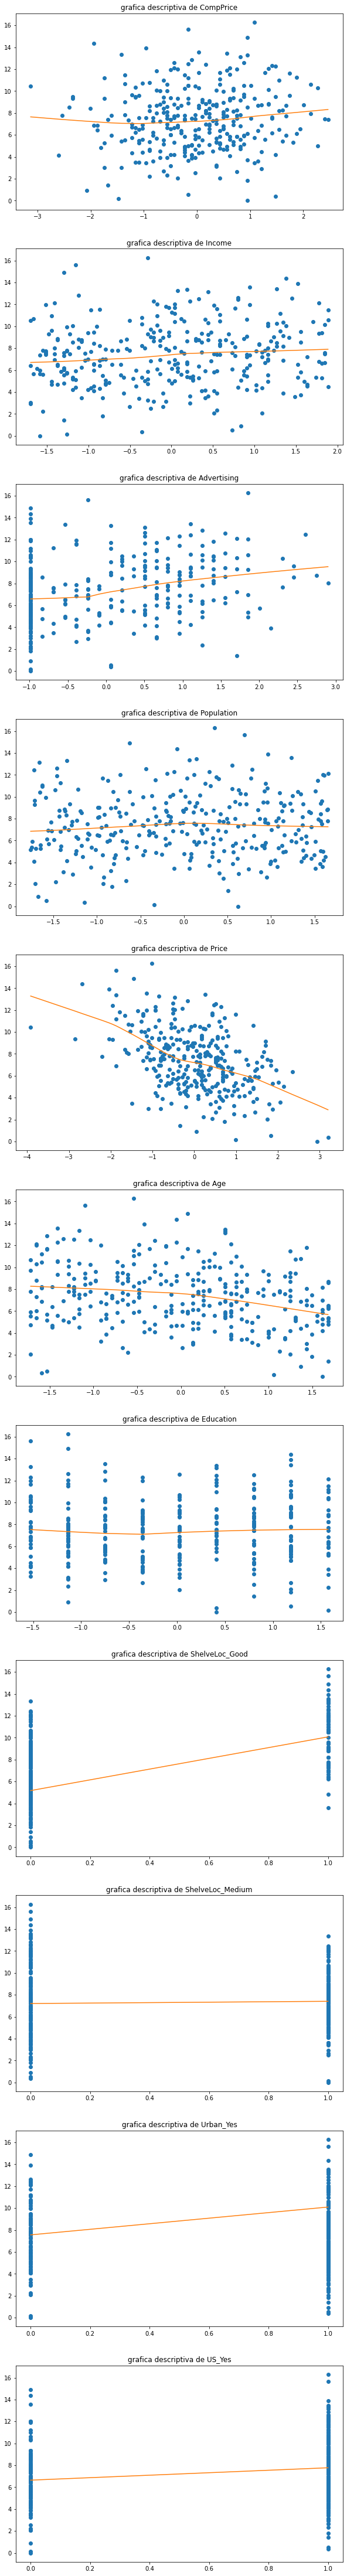

In [40]:
fig ,axes = plt.subplots(nrows=len(XTrain_escalado.columns),ncols=1, figsize=(10, 80))
lowess = sm.nonparametric.lowess #Funciones de suavización para visualización
axs = axes.flatten()

for i, c in enumerate(XTrain_escalado.columns):
    
    smooth = lowess(yTrain,XTrain_escalado[c])
    axs[i].plot(XTrain_escalado[c], yTrain, 'o') 
    axs[i].plot(smooth[:,0],smooth[:,1])

    axs[i].set_title("grafica descriptiva de {}".format(c))

In [41]:
mars_train= earth.Earth().fit(XTrain,yTrain)  #Ajuste modelo MARS
print(mars_train.summary())

Earth Model
----------------------------------------
Basis Function     Pruned  Coefficient  
----------------------------------------
(Intercept)        No      5.45164      
ShelveLoc_Good     No      4.89324      
Price              No      -0.0976574   
CompPrice          No      0.0945874    
Advertising        No      0.118066     
ShelveLoc_Medium   No      2.02584      
Age                No      -0.0456203   
Income             No      0.01502      
Education          Yes     None         
US_Yes             Yes     None         
h(Advertising-19)  Yes     None         
h(19-Advertising)  Yes     None         
----------------------------------------
MSE: 0.9727, GCV: 1.0958, RSQ: 0.8812, GRSQ: 0.8670


c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [42]:
pred_mars=mars_train.predict(XTest)   #Predicción en test
MSEMARS=np.mean((pred_mars-yTest)**2)   #MSE en test
MSEMARS

1.2197370774806404

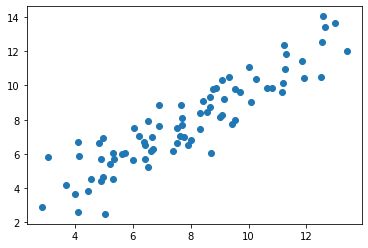

In [43]:
plt.plot(yTest, pred_mars,'o')

### 3b

* Price : segun se evidencia el coeficiente de *Price* tiene un efecto negativo sobre la variable *Sales*, lo cual quiere decir entre mas alto sea el precio menores seran las ventas

* CompPrice : segun el coeficiente el *CompPrice* tiene un efecto positivo sobre la variable *Sales* lo cual implica que entre mas alto sea el precio de la competencia más altas serán las ventas.

* ShelveLoc : La variable *ShelveLoc* fue dividida en variables dummies, ShelveLoc_Medium y ShelveLoc_Good las cuales despues del analisis por sus coeficientes se determina que tienen un efecto positivo sobre *Sales* esto quiere decir que entre "mejor" sea la ubicación, mejores serán las ventas. En el caso de que la locacion sea la correspondiente a *bad* se "pierde" el efecto positivo y por ende las ventas bajarían



### 4. Estimación del modelo GAM e interpretación de predictores (40 puntos)
4.a) Estimen un modelo GAM para predecir la variable "Sales". (10 puntos)

4.b) Interpreten el efecto de los mismos 3 predictores que interpretaron en MARS. ¿Coinciden los
efectos? (10 puntos)

4.c) Prueben la teoría que afirma que las variables "Price" y "Population" no deben ser incluidas en el modelo. (10 puntos)

4.d) Prueben la teoría que afirma que el efecto de la variable "Income" debe ser lineal. (10 puntos)

### 4a
se implementa el modelo colocando las variables categoricas como variables lineales

In [64]:
gam=LinearGAM(terms=s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+l(7)+l(8)+l(9)+l(10)).fit(X=XTrain, y=yTrain)  #Modelo GAM seleccionado términos
gam.summary()
# Las variables categóricas que volvimos numéricas se ponen lineales

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     73.1542
Link Function:                     IdentityLink Log Likelihood:                                  -410.1666
Number of Samples:                          320 AIC:                                              968.6416
                                                AICc:                                            1014.1641
                                                GCV:                                                1.6068
                                                Scale:                                               0.963
                                                Pseudo R-Squared:                                   0.9093
Feature Function                  Lam

C:\Users\paulg\AppData\Local\Temp\ipykernel_11860\1201654507.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [65]:
pred= gam.predict(X=XTest)  #Predicción en test
GAM_MSE=np.mean((pred-yTest.values)**2)  #MSE en test
GAM_MSE

1.4966050010484504

### 4b
para interpretar el efecto de las variables *Price*, *CompPrice* y ShelfLoc se procede a graficar las funciones que ajusto el modelo GAM

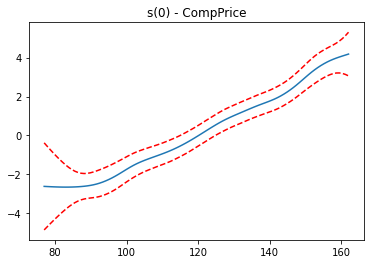

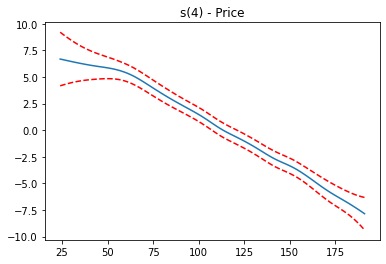

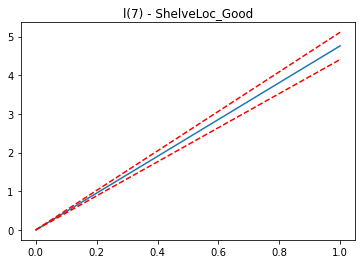

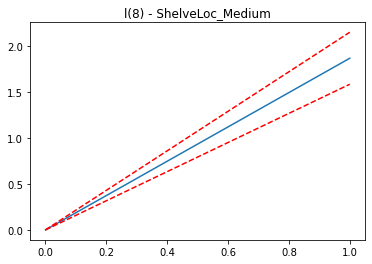

In [67]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    if i in([0,4,7,8]):
        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

        plt.figure()
        plt.plot(XX[:, term.feature], pdep)
        plt.plot(XX[:, term.feature], confi, c='r', ls='--')
        plt.title(str(repr(term)) + " - "+ XTrain.columns[i])
        plt.show()

En este caso despues del ajuste se ve que la variable *CompPrice* tiene un efecto positivo sobre *Sales* ya que cuando este aumenta las ventas tambien lo hacen, contrario al efecto de la variable *Price* que al aumentar su valor logra una reduccion en la variable *Sale*. 
Finalmente las variables dummies de *ShelveLoc* tienen un efecto positivo sobre las ventas esto se evidencia al observar las tendencieas de las graficas, al mirar que el intervalo de confianza se hace mas grande conforme la variable es mas grande se puede inferir que la relacion entre estas variables y la variable *Sales* es no lineal

### 4c - 4d

se procede a crear el modelo de $H_0$

In [69]:
gam2=LinearGAM(terms=s(0)+l(1)+s(2)+s(5)+s(6)+s(7)+s(8)+s(9)).fit(X=XTrain, y=yTrain)  #Modelo gam reducido
gam2.summary()
gam2.coef_[1]

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     43.7603
Link Function:                     IdentityLink Log Likelihood:                                  -808.3137
Number of Samples:                          320 AIC:                                              1706.148
                                                AICc:                                            1721.0856
                                                GCV:                                                5.9885
                                                Scale:                                              4.5352
                                                Pseudo R-Squared:                                   0.5219
Feature Function                  Lam

C:\Users\paulg\AppData\Local\Temp\ipykernel_11860\2151106918.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam2.summary()


2.9630766360735135

Creación del modelo $H_1$

In [55]:
gam=LinearGAM(terms=s(0)+s(1)+s(2)+s(3)+s(4)+s(5)+s(6)+l(7)+l(8)+l(9)+l(10)).fit(X=XTrain, y=yTrain)  #Modelo GAM seleccionado términos
gam.summary()
# Las variables categóricas que volvimos numéricas se ponen lineales

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     73.1542
Link Function:                     IdentityLink Log Likelihood:                                  -410.1666
Number of Samples:                          320 AIC:                                              968.6416
                                                AICc:                                            1014.1641
                                                GCV:                                                1.6068
                                                Scale:                                               0.963
                                                Pseudo R-Squared:                                   0.9093
Feature Function                  Lam

C:\Users\paulg\AppData\Local\Temp\ipykernel_11860\1201654507.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


P - Value

In [70]:
from scipy.stats import chi2

EP=gam2.statistics_['deviance']-gam.statistics_['deviance']  #Cálculo estdístico de prueba
df=gam.statistics_['edof']-gam2.statistics_['edof']  #Cálculo grados de libertad
pvalue=1-chi2.cdf(EP,df)   #Cálculo p-valor
pvalue


0.4653012128923387

El pvalue no es menor a 0.05 entonces no hay suficiente evidencia para rechazar $H_0$

# NO SE DONDE VA ESTA PARTE

In [71]:
lam = np.array([.2, 1])  #Selección de valores de lambda por variable
lams = [lam] * 11

# La siguiente función calibra el modelo para los prámetros lambda. Se encuentra desactivada.
gam.gridsearch(XTrain, yTrain, lam=lams) #Precaución: Puede tomar mucho tiempo

  0% (0 of 2048) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (3 of 2048) |                       | Elapsed Time: 0:00:00 ETA:   0:01:19
  0% (6 of 2048) |                       | Elapsed Time: 0:00:00 ETA:   0:01:18
  0% (9 of 2048) |                       | Elapsed Time: 0:00:00 ETA:   0:01:18
  0% (12 of 2048) |                      | Elapsed Time: 0:00:00 ETA:   0:01:20
  0% (15 of 2048) |                      | Elapsed Time: 0:00:00 ETA:   0:01:20
  0% (18 of 2048) |                      | Elapsed Time: 0:00:00 ETA:   0:01:21
  1% (21 of 2048) |                      | Elapsed Time: 0:00:00 ETA:   0:01:22
  1% (24 of 2048) |                      | Elapsed Time: 0:00:00 ETA:   0:01:22
  1% (26 of 2048) |                      | Elapsed Time: 0:00:01 ETA:   0:01:22
  1% (29 of 2048) |                      | Elapsed Time: 0:00:01 ETA:   0:01:21
  1% (32 of 2048) |                      | Elapsed Time: 0:00:01 ETA:   0:01:20
  1% (35 of 2048) |                     

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + l(7) + l(8) + l(9) + l(10) + intercept,
   tol=0.0001, verbose=False)

In [72]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      67.953
Link Function:                     IdentityLink Log Likelihood:                                  -412.1607
Number of Samples:                          320 AIC:                                              962.2275
                                                AICc:                                             1000.808
                                                GCV:                                                1.5304
                                                Scale:                                              0.9594
                                                Pseudo R-Squared:                                   0.9077
Feature Function                  Lam

C:\Users\paulg\AppData\Local\Temp\ipykernel_11860\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [73]:
gam2=LinearGAM(terms=s(0)+l(1)+s(2)+s(5)+s(6)+s(7)+s(8)+s(9)).fit(X=XTrain, y=yTrain)  #Modelo gam reducido
gam2.summary()
gam2.coef_[1]

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     43.7603
Link Function:                     IdentityLink Log Likelihood:                                  -808.3137
Number of Samples:                          320 AIC:                                              1706.148
                                                AICc:                                            1721.0856
                                                GCV:                                                5.9885
                                                Scale:                                              4.5352
                                                Pseudo R-Squared:                                   0.5219
Feature Function                  Lam

C:\Users\paulg\AppData\Local\Temp\ipykernel_11860\2151106918.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam2.summary()


2.9630766360735135

### 5. Concluir sobre la capacidad predictiva de los modelos (10 puntos)
¿Cuál modelo de los estimados en los apartados 2, 3.a y 4.a resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

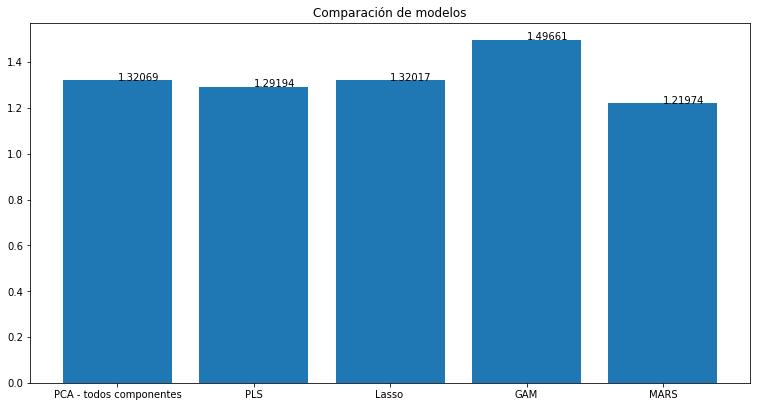

In [86]:
MSE_models = [round(MSEPCAfull,5),round(MSEPLS,5),round(MSEElastic,5),round(GAM_MSE,5),round(MSEMARS,5)]


fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['PCA - todos componentes', 'PLS', 'Lasso ','GAM', 'MARS']
ejeY = MSE_models
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 5)